In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
data = pd.read_csv('.\Dataset\car_purchasing.csv', encoding = 'latin1')

In [31]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# Exploratory Data Analysis

## Data Exploration:

In [32]:
data.shape

(500, 9)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [34]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [35]:
# Customer name and email id is not important of analysis. Hence, we will remove it.

data.drop(['customer name', 'customer e-mail'], axis = 1, inplace = True)

In [36]:
data.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [37]:
# Let us check unique values in gender

print(f"There are {len(data['gender'].unique())} unique values i.e. {data['gender'].unique()} in gender")

There are 2 unique values i.e. [0 1] in gender


In [38]:
# Let us round of the numerical values to integer.

for col in data:
    if data[col].dtype == 'float64':
        data[col] = data[col].astype(int)

In [39]:
data.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41,62812,11609,238961,35321
1,Belize,0,40,66646,9572,530973,45115
2,Algeria,1,43,53798,11160,638467,42925
3,Cook Islands,1,58,79370,14426,548599,67422
4,Brazil,1,57,59729,5358,560304,55915


In [40]:
data.isna().sum()

country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [41]:
# Let us check unique number of country, gender and age 

for col in ['country', 'gender', 'age']:
    val = data[col].unique()
    print('Total number of unique value in {} is {}, '.format(col, len(val)))

Total number of unique value in country is 211, 
Total number of unique value in gender is 2, 
Total number of unique value in age is 44, 


### Types of Variables:

In [42]:
# Let us check total numbers of numerical data columns
for col in data.columns:
    numerical_data = [col for col in data.columns if data[col].dtype != 'object']
    
print('Total number of numerical columns are: ', len(numerical_data))    

Total number of numerical columns are:  6


In [43]:
# Let us check sub-type of numerical data columns

for col in numerical_data:
    discrete_data = [col for col in numerical_data if len(data[col].unique()) <= 25]

print('Total number of  discrete data columns are: ', len(discrete_data))
print(f'The discrete data column is: {discrete_data}')
print('Total number of continuous data columns are: ', len(numerical_data) - len(discrete_data))

Total number of  discrete data columns are:  1
The discrete data column is: ['gender']
Total number of continuous data columns are:  5


In [44]:
for col in data.columns:
    categorical_data = [col for col in data.columns if col not in numerical_data]
print('Total number of categorical columns are: ', len(categorical_data))
print('The categorical column is: {}'.format(categorical_data))

Total number of categorical columns are:  1
The categorical column is: ['country']


## Data Visualization:

Text(0.5, 1.0, 'Count Plot of Gender')

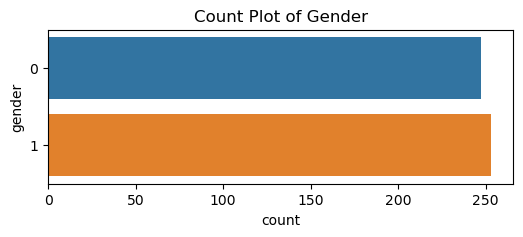

In [45]:
# Initially, let us see which gender is highly contributing in sales.

plt.figure(figsize = (6, 2))
sns.countplot(data = data, y = data['gender'])
plt.title('Count Plot of Gender')

Observation:
    
1. We can see that there are not much difference in sales between males and females. Males slighly contribute higher than female.

(Note: 0 = Female, 1 = Male)

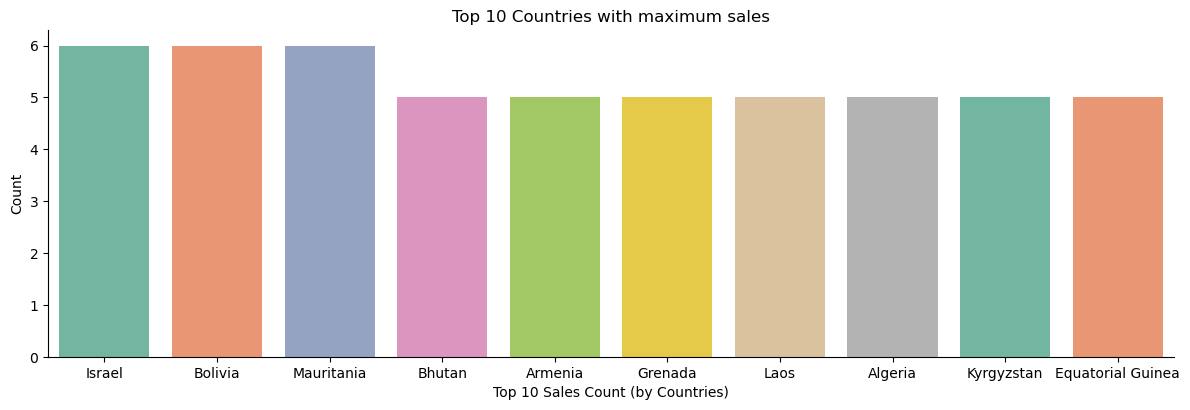

In [46]:
# Let us see which top 10 countries has highest count of sales 

top_10_country = data['country'].value_counts().sort_values(ascending = False).head(10)
top_10_country_df = pd.DataFrame({'Country': top_10_country.index, 'Count': top_10_country.values})

g = sns.catplot(data = top_10_country_df, x = 'Country', y = 'Count', kind = 'bar', height = 4, aspect =3, palette='Set2')
plt.xlabel('Top 10 Sales Count (by Countries)')
plt.ylabel('Count')
plt.title('Top 10 Countries with maximum sales')
plt.show()

### Observations:

1. Israel has highest sales where maximum buyer is male.
2. Most of the countries like Israel, Mauritania, Bhutan has male as maximum buyers.
3. Equatorial Guinea has the least sales in top 10 list where all buyers are female.



(Note: 1 = Male, 0 = Female) 

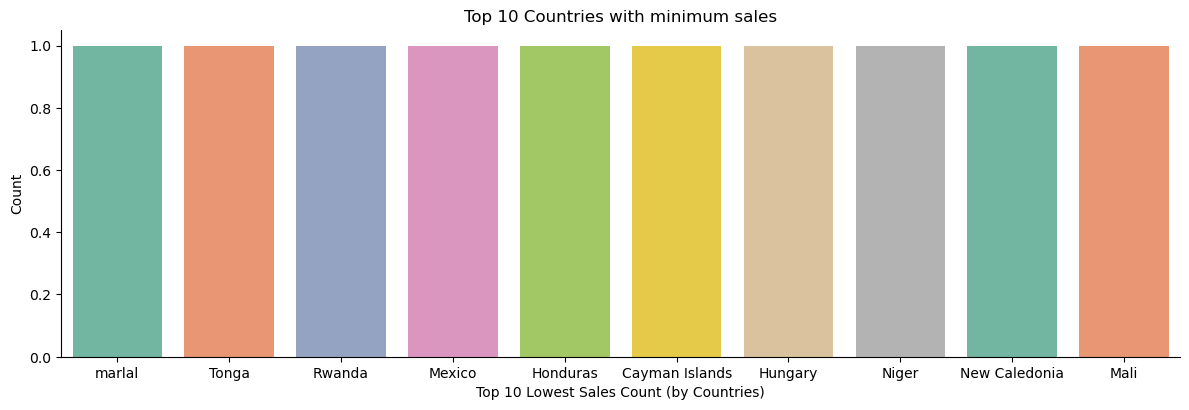

In [47]:
# Let us see which top 10 countries has lowest sales

bot_10_country = data['country'].value_counts().sort_values(ascending = True).head(10)
bot_10_country_df = pd.DataFrame({'Country': bot_10_country.index, 'Value': bot_10_country.values})

sns.catplot(data = bot_10_country_df, x = 'Country', y = 'Value', kind = 'bar', height = 4, aspect =3, palette='Set2')
plt.xlabel('Top 10 Lowest Sales Count (by Countries)')
plt.ylabel('Count')
plt.title('Top 10 Countries with minimum sales')
plt.show()

### Observation:

Six out of ten countries having minimum sales has female as a buyer.
So, we can conclude that males are important part if we need to increase the sales of the product. 

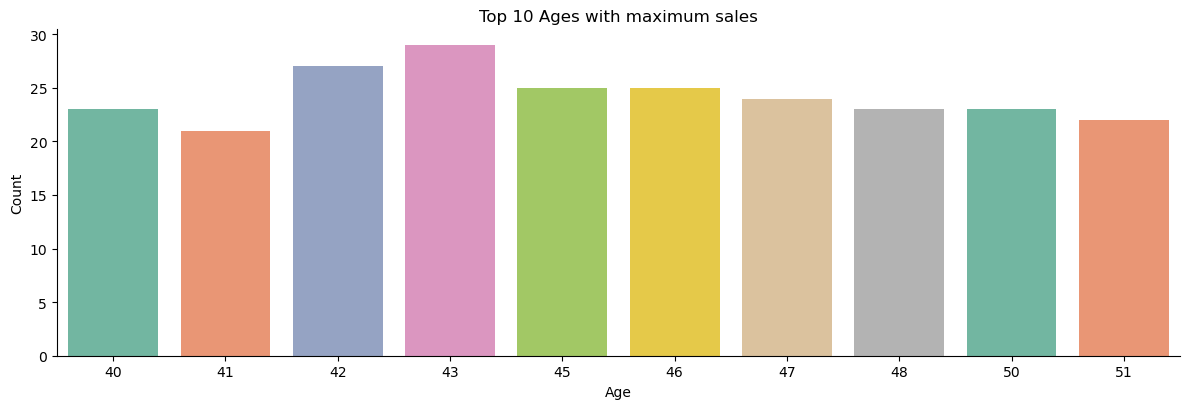

In [48]:
# Now, let us see the affect of age on sales.

top_10_country = data['age'].value_counts().sort_values(ascending = False).head(10)
top_10_country_df = pd.DataFrame({'Age': top_10_country.index, 'Count': top_10_country.values})

sns.catplot(data = top_10_country_df, x = 'Age', y = 'Count', kind = 'bar', height = 4, aspect =3, palette='Set2')
plt.title('Top 10 Ages with maximum sales')
plt.show()

### Observation:
    
1. In above plot we can say that age 43 has maximum sales and female of age 43 are largest buyers.
2. Most of the top 10 sales by age, we can say that females are maximum buyer.
3. This can lead to conlusion that people between age 40 and 60 are buying a product. 

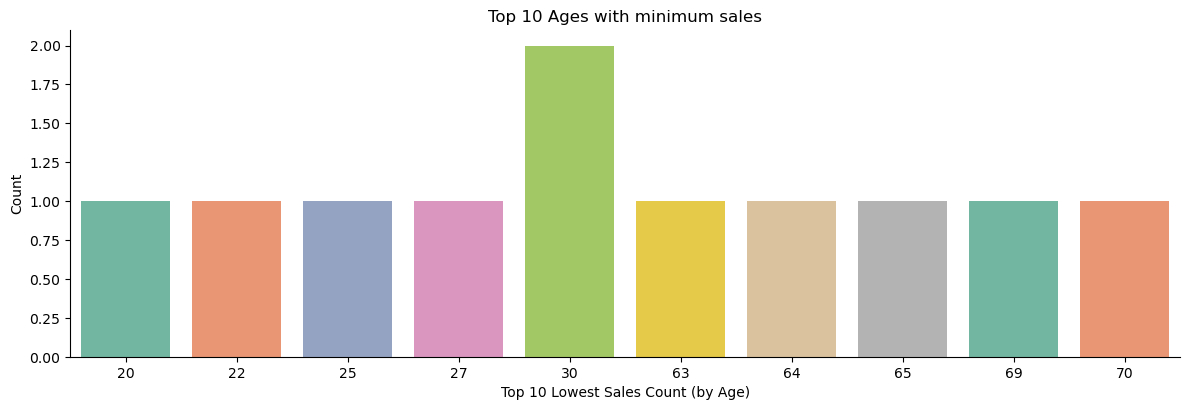

In [54]:
# Now let us see the top 10 least sales by age.

bot_10_country = data['age'].value_counts().sort_values(ascending = True).head(10)
bot_10_country_df = pd.DataFrame({'Age': bot_10_country.index, 'Count': bot_10_country.values})

g = sns.catplot(data = bot_10_country_df, x = 'Age', y = 'Count', kind = 'bar', height = 4, aspect =3, palette='Set2')
plt.xlabel('Top 10 Lowest Sales Count (by Age)')
plt.ylabel('Count')
plt.title('Top 10 Ages with minimum sales')
plt.show()

### Observation:

1. People above 60 and people below 30 are least sales age group.
2. So, we can conlude that people having age between 40 to 60 has given maximum sales.

## Final Obseravtion:

1. To increase the sales the target customers should be in the age group of 40 to 50.
2. Credit card loan should be appreciated while selling the product.
3. Selling product in range of 40,000 to 50,000 should be given priority.
4. Israel, Bolivia, Mauritania, Bhutan should be targeted for selling.
5. Marial, Tonga, Rwanda, Mexico should be targeted for marketing (as there might be less penetration of company in this region)

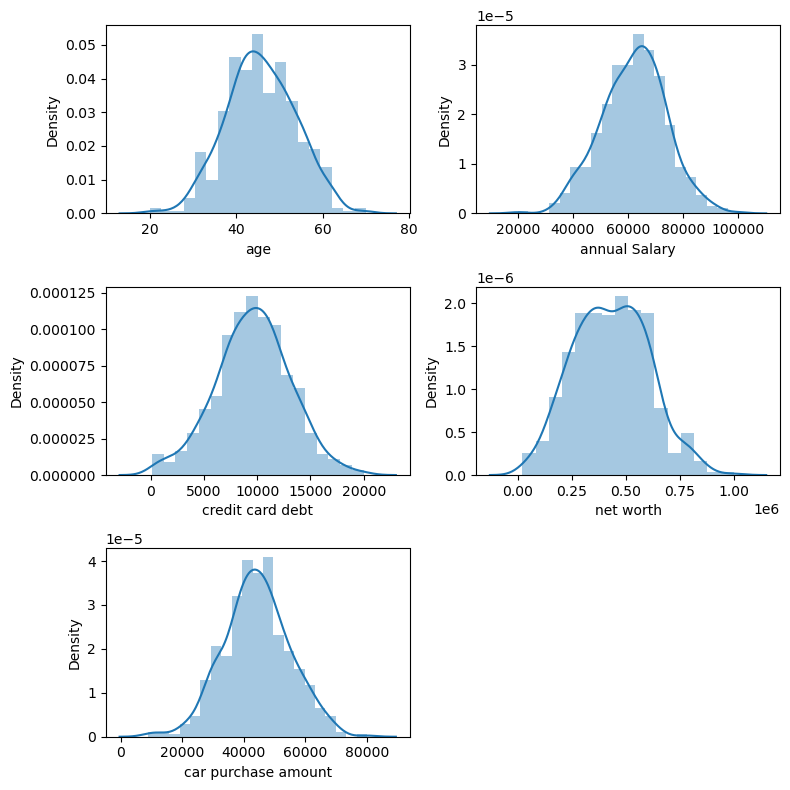

In [55]:
# Now, let us see the distribution of each numerical value

plt.figure(figsize = (8, 8))
num_col = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']
for i, col in enumerate(num_col, 1): 
    plt.subplot(3, 2, i)
    sns.distplot(data[col], kde = True)
    
plt.tight_layout()
plt.show()

## Observation:

From the above distribution, we can see that all numerical columns are normally distributed

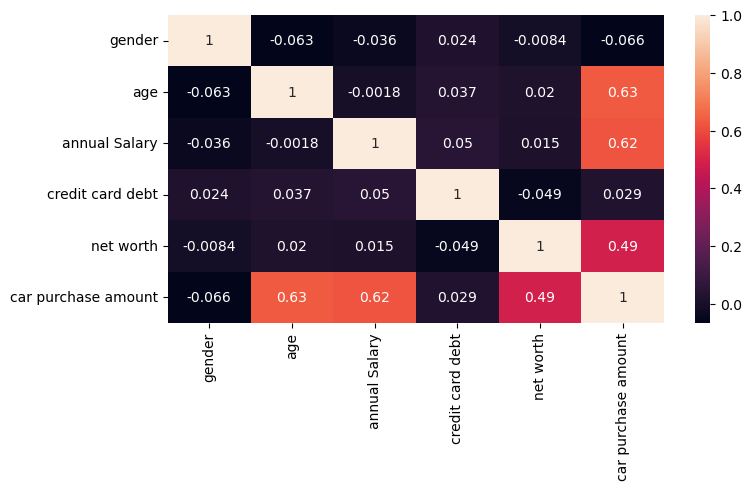

In [56]:
# Now, let us see the correlation between columns

plt.figure(figsize = (8, 4))
sns.heatmap(data.corr(), annot = True, cbar = True)
plt.show()

### Observation:

We can see that car purchase amount has good correlation with age, annual salary and net worth.        

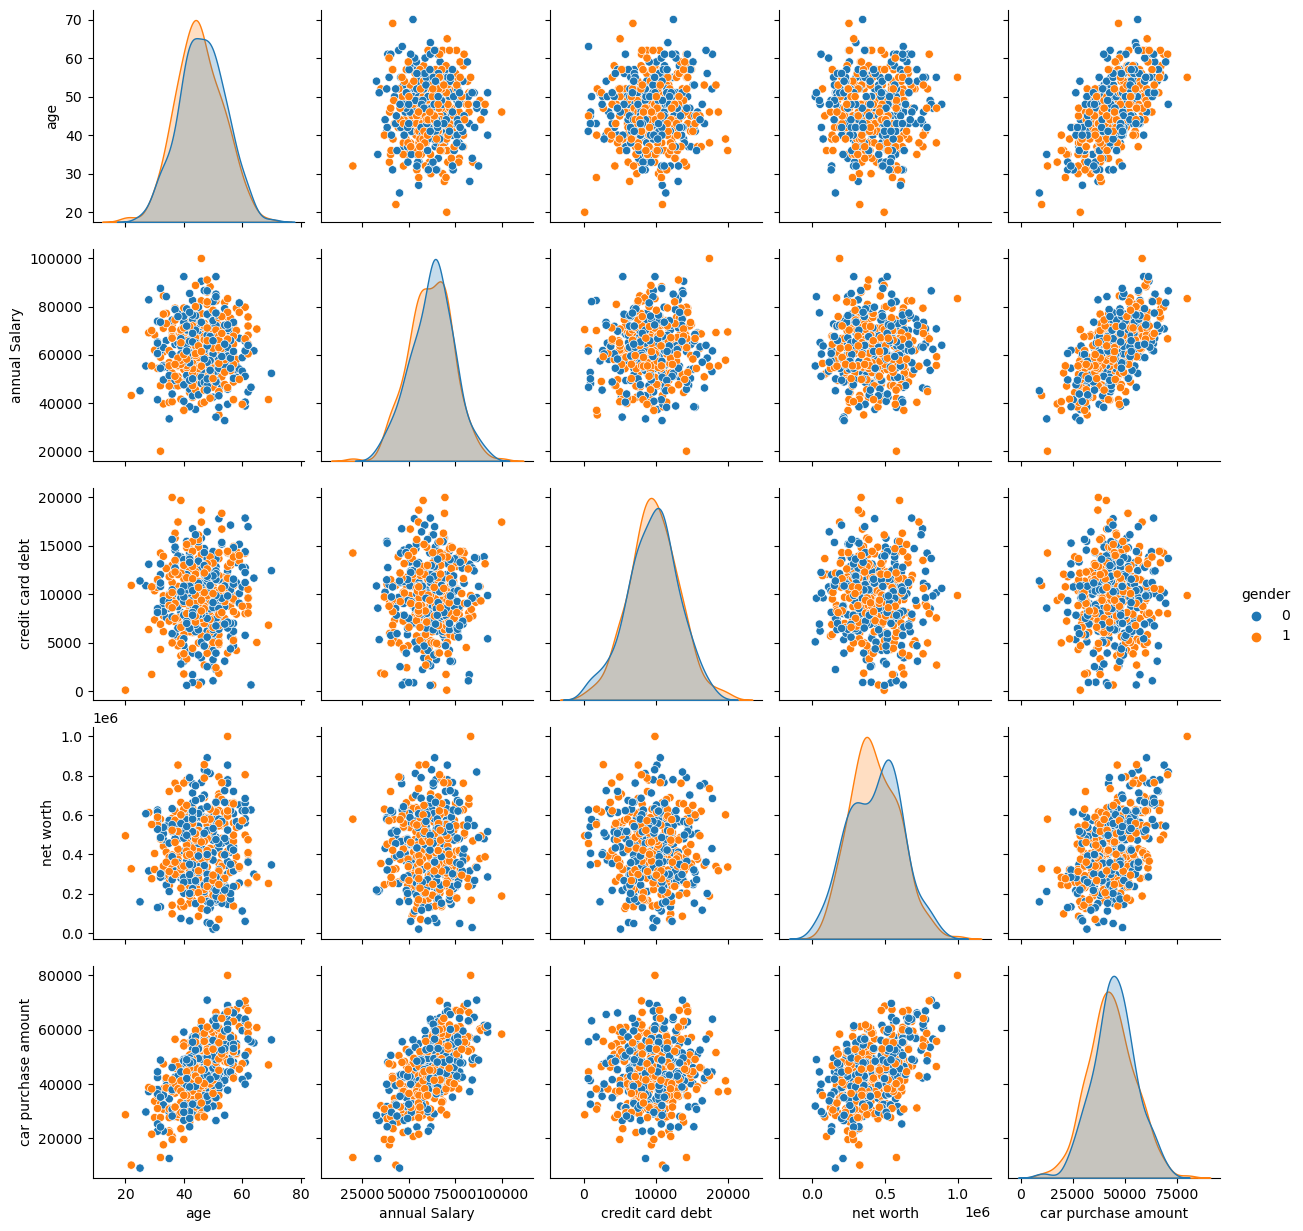

In [57]:
# Now, let us see bivariate plot

sns.pairplot(data, hue = 'gender')

### Observation:

1. From the above plot it is clear that the numerical variables have linear relationship with car purchase amount. Hence,we will build multi-linear regression model to predict car purchase amount 

In [58]:
# Let us standardize the dataset using standard scaler

data1 = data.drop(['country', 'car purchase amount'], axis = 1)
scaler = MinMaxScaler()
data1 = pd.DataFrame(scaler.fit_transform(data1), columns = data1.columns)

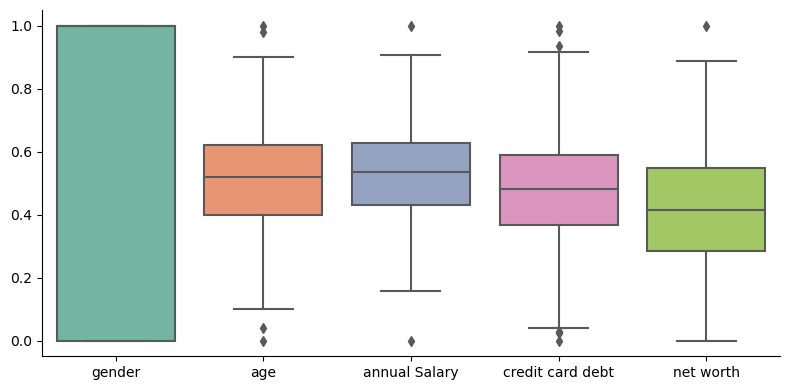

In [59]:
# Let us check the outliers in the dataset

sns.catplot(data = data1, kind = 'box', height=4, aspect=2, palette='Set2')
plt.show()

## Observation:

From the above boxplot, we can see that there does exist outliers.

# Predictive Model Building

In [60]:
# Now, let us create the model

X = data1
Y = data['car purchase amount']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

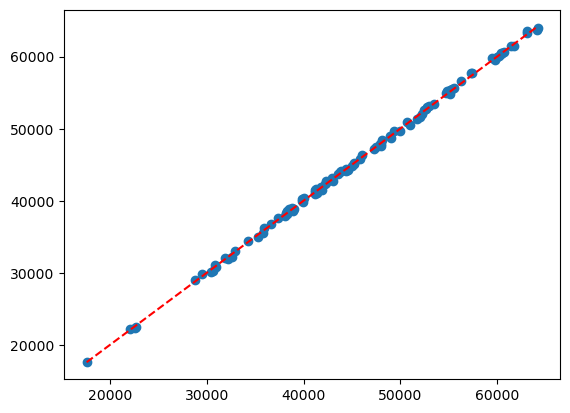

In [61]:
# Let us plot the relation between predicted and actual value

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.scatter(y_test, y_pred)

In [62]:
# Let us find mean absolute error, r-square value in order to find performance of model

mspe = mean_absolute_percentage_error(y_test, y_pred)*100
r_square = r2_score(y_test, y_pred)
print('Mean Absolute Percentage Error is, ', np.round(mspe, 2), '%')
print("R square value is, ", np.round(r_square, 4))

Mean Absolute Percentage Error is,  0.5 %
R square value is,  0.9994


# Model Deployment

In [63]:
# We will save the modle using joblib

import joblib

# for scaling the input values 
joblib.dump('scaler', 'scaler.joblib')

# for predicting the model output
joblib.dump('model', 'product_price_prediction.joblib')

['product_price_prediction.joblib']

In [620]:
## let us predict price for some values

gender = int(input('Enter gender Value (0 = Female, 1 = Male): '))
age = int(input('Enter age value: '))
annual_sal = int(input('Enter annual salary value: '))
credit_card_debt = int(input('Enter credit card debt: '))
net_worth = int(input('Enter the net worth: '))

input_data = pd.DataFrame({'gender': gender,
                           'age': age,
                           'annual Salary': annual_sal,
                           'credit card debt': credit_card_debt,
                           'net worth': net_worth}, index = [0])

scaler_model = joblib.load('scaler.joblib')
predict_model = joblib.load('product_price_prediction.joblib')
                    
input_data = scaler.transform(input_data)
predict_value = model.predict(input_data)

Enter gender Value (0 = Female, 1 = Male): 1
Enter age value: 58
Enter annual salary value: 79370
Enter credit card debt: 14426
Enter the net worth: 548599


In [621]:
print('The predicted car purchase amount is,', int(predict_value))

The predicted car purchase amount is, 67555
